<a href="https://colab.research.google.com/github/aayushg1007/Torrent-Downloader/blob/main/Torrent_To_Google_Drive_Downloader_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torrent To Google Drive Downloader FTC

### Mount Google Drive
To stream files we need to mount Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Dependency

In [2]:
!apt install python3-libtorrent

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libtorrent-rasterbar9
Suggested packages:
  libtorrent-rasterbar-dbg
The following NEW packages will be installed:
  libtorrent-rasterbar9 python3-libtorrent
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,569 kB of archives.
After this operation, 5,718 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtorrent-rasterbar9 amd64 1.1.5-1build1 [1,258 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-libtorrent amd64 1.1.5-1build1 [310 kB]
Fetched 1,569 kB in 0s (5,018 kB/s)
Selecting previously unselected package libtorrent-rasterbar9.
(Reading database ... 155632 files and directories currently insta

In [3]:
!pip install --upgrade pip setuptools wheel
!pip install lbry-libtorrent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 49.8 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.8 MB/s eta 0:00:00


### Code to download torrent
#### Note:
Run this command in your browser's console (Press `Ctrl+Shift+I`) as shown below...

`javascript:void(setInterval(function(){ console.log("Connect pushed"); document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click(); },60000))`

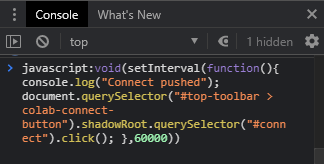


In [ ]:

import libtorrent as lt
import time
import datetime

list1= [0,1,2,3]

ses = lt.session()
ses.listen_on(6881, 6891)
params = {
    'save_path': '/content/drive/My Drive/Torrent/',
    'storage_mode': lt.storage_mode_t(2)}

link = str(input("Enter your link here: "))
print(link)

handle = lt.add_magnet_uri(ses, link, params)
ses.start_dht()

begin = time.time()
print(datetime.datetime.now())

print ('Downloading Metadata...')
while (not handle.has_metadata()):
    time.sleep(1)
print ('Got Metadata, Starting Torrent Download...')

print("Starting", handle.name())

while (handle.status().state != lt.torrent_status.seeding):
    
    s = handle.status()
    state_str = ['queued', 'checking', 'downloading metadata',
            'downloading', 'finished', 'seeding', 'allocating']
    print ('\r\033[1;36;40m %.2f%% complete (down: %.1f kb/s up: %.1f kB/s peers: %d) %s' % \
            (s.progress * 100, s.download_rate / 1000, s.upload_rate / 1000, \
            s.num_peers, state_str[s.state]), end="")
    
    time.sleep(1)

end = time.time()
print(handle.name(), "COMPLETE")

print("Elapsed Time: ",int((end-begin)//60),"min :", int((end-begin)%60), "sec")

print(datetime.datetime.now())

Enter your link here: magnet:?xt=urn:btih:5FCA719641619E858C609B5D9C75E60B9B09A94A&tr=http%3A%2F%2Fbt4.t-ru.org%2Fann%3Fmagnet&dn=Splice%20Sounds%20-%20Sounds%20of%20KSHMR%20Vol.3%20(WAV)
magnet:?xt=urn:btih:5FCA719641619E858C609B5D9C75E60B9B09A94A&tr=http%3A%2F%2Fbt4.t-ru.org%2Fann%3Fmagnet&dn=Splice%20Sounds%20-%20Sounds%20of%20KSHMR%20Vol.3%20(WAV)
2022-06-13 19:14:11.327758
Got Metadata, Starting Torrent Download...
Starting Splice Sounds - Sounds of KSHMR Vol.3
 34.22% complete (down: 6277.6 kb/s up: 189.7 kB/s peers: 35) downloading